#### Creating Erdos-Renyi networks

---

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Erdos_Renyi_GNP:
    def __init__(self, N, p, A = None, self_edges = False):
        
        
        '''
            N -> the number of nodes, N >= 2, or vertices.  This must be declared on start-up to create a graph.
            p -> the probability on [0, 1] an edge forms between two nodes.  This must be declared on start-up.
            self_edges -> a Boolean whether or not a node can connect to itself.  In most applications, no.
        
        '''
        
        self.N = N
        self.p = p
        
        '''
            A -> the adjacency matrix, or the representation of all edge connections.  Index 0 refers to Node 0.
            D -> the degree matrix, or the sum of A of only one axes.  If 0, unconnected.  If N - 1, fully connected.
            L -> the Laplacian matrix as defined by L = D - A.  This allows for spectral analysis.
            M -> the total number of edges by summing A and then dividing by 2, since it mirrors across the diagonal.
        
        '''
        
        # This basically creates the adjacency matrix by creating an N x N random array
        # which has values from [0, 1].  So, it should be probabilistic enough to use < p
        # to remove all values greater than that.  Taking the upper triangular (triu)
        # allows us to force symmetry.  Although, this is one source of error
        # because it interrupts the probabilistic process.
        if A == None:
            self.A = np.triu(np.array(np.random.rand(N, N) < p, dtype = int))
            if self_edges == False:

                # If there are no self edges, we remove the diagonal
                # since entry [0, 0] for example refers to Node0 <-> Node0.
                self.A = self.A + self.A.T - 2*np.diag(np.diag(self.A))

            else:
                self.A = self.A + self.A.T - np.diag(np.diag(self.A))
        else:
            self.A = A
        
        # This sums the elements vertically then puts them in the diagonals
        # of a zero array.
        self.D = np.diag(np.sum(self.A, axis = 1))
        self.L = self.D - self.A
        
        # Since we assume this matrix is non-directional, then the lower and upper parts
        # have the same values, so we must divide by two after summing.
        self.M = np.sum(self.A)/2
        
        self.edges = np.argwhere(np.triu(self.A) != 0)
        self.potential_edges = np.argwhere((np.triu(1 - self.A) - np.diag(np.ones(self.N)) != 0))
     
    def plot_graph(self, figsize = (4, 4)):
        
        fig, ax = plt.subplots(1, 1, figsize = figsize)
        
        ax.spy(self.A)
        
        ax.set_ylabel('node ID, $y$', fontsize = 12)
        ax.set_xlabel('node ID, $x$', fontsize = 12)
        ax.xaxis.set_label_coords(0.5, 1.175)
        
        return fig, ax
    
    def rewire_graph(self):
        
        # Choose at random since ER
        idx = np.random.randint(self.edges.shape[0])
        
        # Remove
        r_ij, r_ji = self.edges[idx]
        A_ij, A_ji = self.A[r_ij, r_ji].copy(), self.A[r_ji, r_ij].copy()
        
        self.A[r_ij, r_ji] = 0
        self.A[r_ji, r_ij] = 0
        
        self.potential_edges = np.append(self.potential_edges, self.edges[idx].reshape(1, 2), axis = 0)
        self.edges = np.delete(self.edges, idx, axis = 0)
        
        potential_idx = np.random.randint(self.potential_edges.shape[0])
        
        a_ij, a_ji = self.potential_edges[potential_idx]
 
        self.A[a_ij, a_ji] = A_ij
        self.A[a_ji, a_ij] = A_ji
        
        self.edges = np.append(self.edges, self.potential_edges[potential_idx].reshape(1, 2), axis = 0)
        self.potential_edges = np.delete(self.potential_edges, potential_idx, axis = 0)
        
        self.M = self.edges.shape[0]
    

In [13]:
N = 50; p = 0.5
g0 = Erdos_Renyi_GNP(N, p)

In [14]:
A0 = g0.A.copy()

In [15]:
g0.rewire_graph()

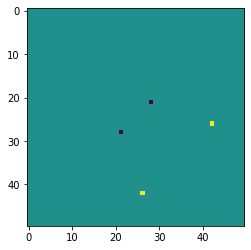

In [17]:
plt.imshow(A0 - g0.A)

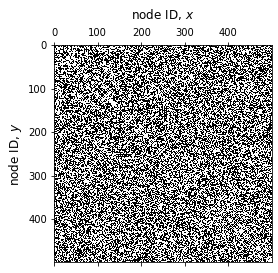

In [4]:
fig, ax = g0.plot_graph()

#### Basic Monte Carlo

In [135]:
Ms = []
Nd = []

for i in range(100):
    g = Erdos_Renyi_GNP(N, p)
    Ms.append(g.M)
    
    d = np.diag(g.D)
    Nd.append(np.average(d))

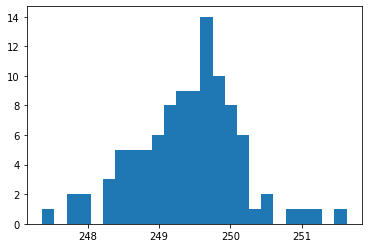

In [136]:
plt.hist(Nd, 25);

Note that the expected number of edges $\bar{M}$ for this configuration is simply

\begin{equation}
\bar{M} = \dfrac{N(N - 1)}{2} \cdot p
\end{equation}

In [132]:
np.average(Nd)

124.53720000000003

In [119]:
np.std(Nd)/np.sqrt(10000)

0.006976678796218156

because $N(N - 1)/2$ is the total possible number of edges (which comes from removing the diagonal) and $p$ is then the probability an edge forms.

In [80]:
np.mean(Ms) + np.std(Ms)/np.sqrt(10000), np.mean(Ms) - np.std(Ms)/np.sqrt(10000)

(612.6393344812357, 612.2910855187642)

In [81]:
np.std(Ms)/np.sqrt(10000)

0.17412448123566654

In [82]:
N*(N - 1)/2 * p

612.5

In [62]:
np.diag(g.A)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0])